In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
k=10 # number of arms
num_problems = 2000 
q_star = np.random.normal(0, 1, (num_problems,k))
arms=[0]*k
for i in range(10):
    arms[i] = np.random.normal(q_star[0,i], 1,2000)

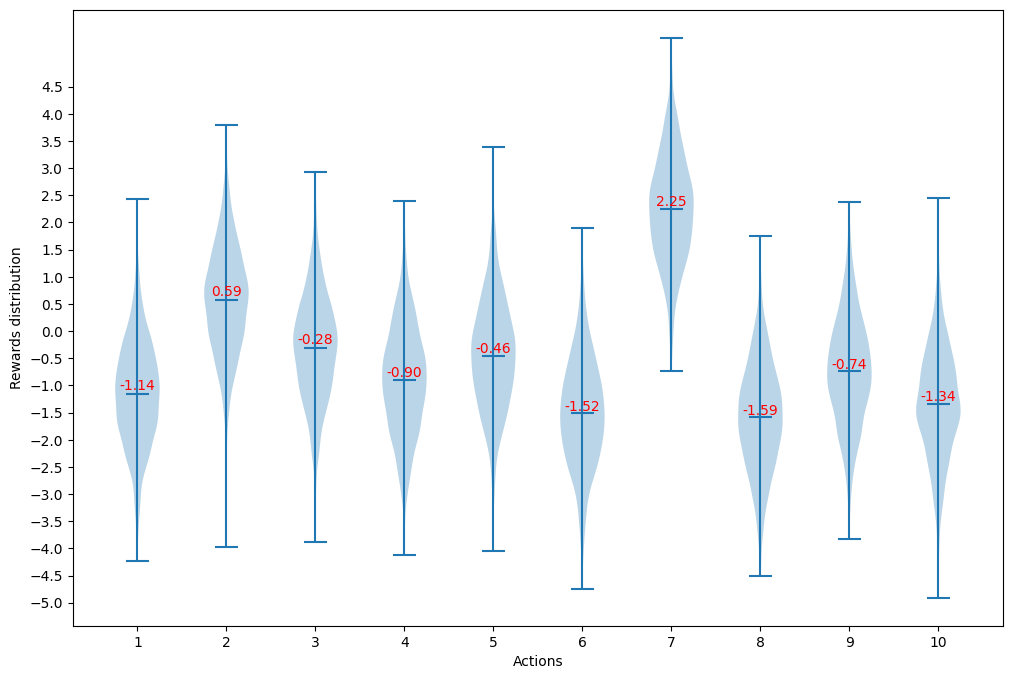

In [6]:
plt.figure(figsize=(12,8))
plt.ylabel('Rewards distribution')
plt.xlabel('Actions')
plt.xticks(range(1,11))
plt.yticks(np.arange(-5,5,0.5))

plt.violinplot(arms, positions=range(1,11), showmeans=True)
medians=[np.median(arms[i]) for i in range(10)]

for i, median in enumerate(medians, start=1):
  plt.text(i, median, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='red')


plt.show()

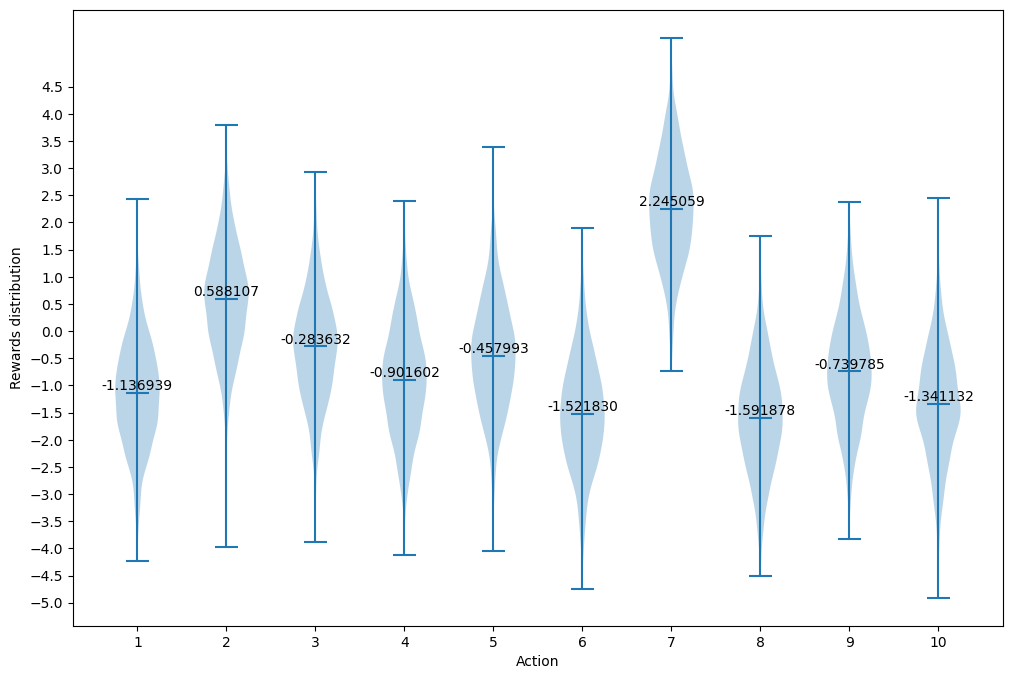

In [7]:
plt.figure(figsize=(12,8))
plt.ylabel('Rewards distribution')
plt.xlabel('Action')
plt.xticks(range(1,11))
plt.yticks(np.arange(-5,5,0.5))
plt.violinplot(arms, positions=range(1, 11), showmedians=True)
medians = [np.median(arms[i]) for i in range(10)]

for i, median in enumerate(medians, start=1):
    plt.text(i, median, f'{median:2f}', ha = 'center', va = 'bottom', fontsize=10, color = 'black')

plt.show()

In [8]:
#incremental implementation
def bandit(action, problem):
  return np.random.normal(q_star[problem,action],1)

In [9]:
def simple_max(Q, N, T):
    #return np.argmax(Q)
    return np.random.choice(np.flatnonzero(Q == Q.max())) # if same value persists then it breaks the ties by selecting any one randomly

#Q: A list/arrua pf esto,ated actopm va;ies (expected rewards for each arm)
#N: represents the number of times each arm has been selected
#t: represents the current timestep in the bandit problem

In [10]:
def simple_bandit(k, epsilon, steps, initial_Q, alpha=0, argmax_func=simple_max):
    rewards = np.zeros(steps) # cumulative rewards per step
    actions = np.zeros(steps) # count of optiomal actions selected per step

    for i in tqdm(range(num_problems)): #loop over problme instances
        Q = np.ones(k) * initial_Q # initialize Q
        N = np.zeros(k) # initialize number of rewards given
        best_action = np.argmax(q_star[i]) #optimal actioin for problem instance
        for t in range(steps):
            #Epsilon-greedy action selection
            if np.random.rand() < epsilon: # explore (random action)
                a = np.random.randint(k)
            else: # exploit
                a = argmax_func(Q, N, t) # Exploit (greedy action)
            #Get reward from bandit environment
            reward = bandit(a,i)
            #Update action count
            N[a] += 1
            #Update Q-value using incremental update or fixed step-size
            if alpha > 0:
                Q[a] = Q[a] + (reward - Q[a]) * alpha #fixed step-size update
            else:
                Q[a] = Q[a] + (reward - Q[a]) / N[a] # Sample-average update
            #Track rewards and optimal action selections
            rewards[t] += reward
            #compute averate rewards and optimal action selection percentage
            if a == best_action:
                actions[t] += 1

    return np.divide(rewards, num_problems), np.divide(actions, num_problems)

In [11]:
ep_0, ac_0 = simple_bandit(k = 10, epsilon = 0, steps = 1000, initial_Q = 0)
ep_01, ac_01 = simple_bandit(k = 10, epsilon = 0.01, steps = 1000, initial_Q = 0)
ep_1, ac_1 = simple_bandit(k = 10, epsilon = 0.1, steps = 1000, initial_Q = 0)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:34<00:00, 21.09it/s]


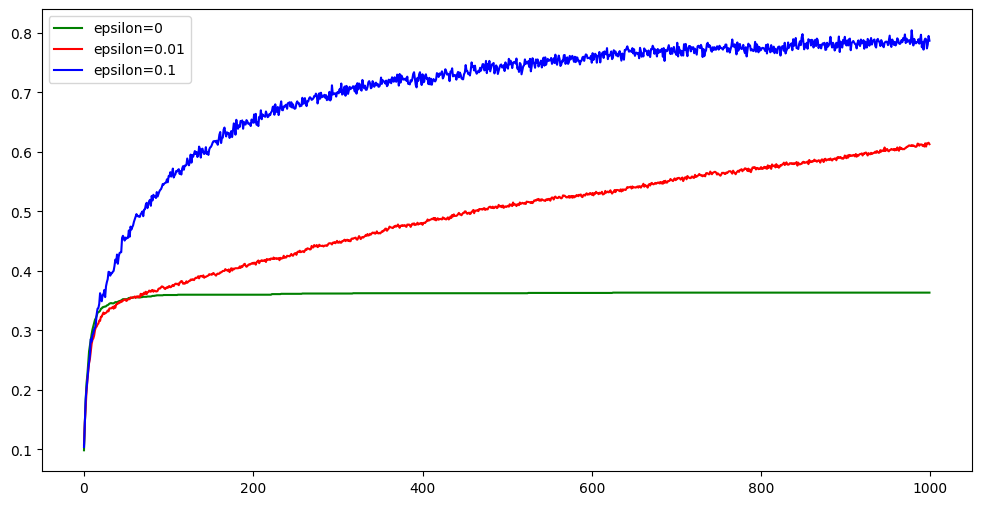

In [12]:
plt.figure(figsize=(12,6))
plt.plot(ac_0,'g', label='epsilon=0')
plt.plot(ac_01,'r', label='epsilon=0.01')
plt.plot(ac_1,'b', label='epsilon=0.1')
plt.legend()
plt.show()

In [13]:
#ep_0, ep_01, ep_1 - Average Rewards per step ie This shows how the rewards change over the first step


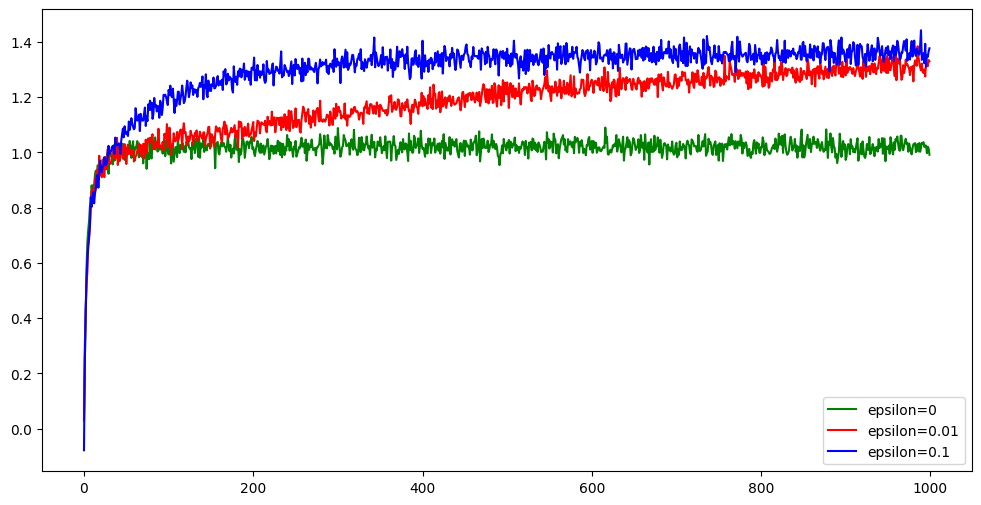

In [14]:
plt.figure(figsize=(12,6))
plt.plot(ep_0,'g', label='epsilon=0')
plt.plot(ep_01,'r', label='epsilon=0.01')
plt.plot(ep_1,'b', label='epsilon=0.1')
plt.legend()
plt.show()

Plot compares the percentage of optimal action selection over time for two strategies:

ac_1(Red - 'Realistic') - E = 0.1, initial_Q = 0
ac_opt_0 (Blue - 'Optimistic') - E = 0, initial_Q = 5, alpha = 0.2

Optimistic initialization (init_Q = 5) accelerates learning. Exploration-based methods (e = 0.1) require more trails to learn the best action Both strategies may eventually reach a similar success rate

In [15]:
opt_0, ac_opt_0 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=5, alpha = 0.2)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:43<00:00, 19.32it/s]


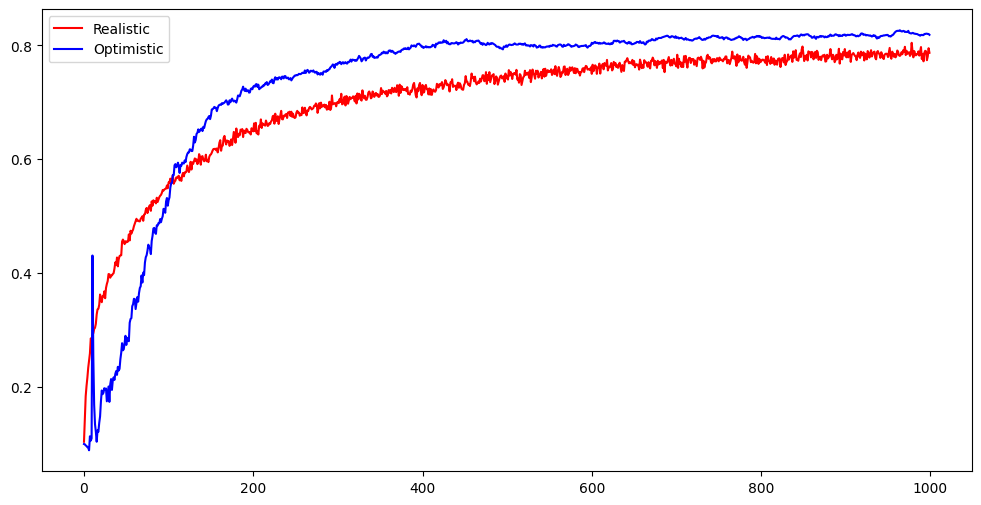

In [16]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0, 3, 0.2))
plt.plot(ac_1,'r', label='Realistic')
plt.plot(ac_opt_0,'b', label='Optimistic')
plt.legend()
plt.show()

In [17]:
def ucb(Q, N, t): #function using UCB for action selection problem
    c = 2
    if N.min() == 0:
        return np.random.choice(np.flatnonzero(N == N.min()))

    M = Q + c * np.sqrt(np.divide(np.log(t), N))
    return np.argmax(M) # breaming ties randomly

In [18]:
ucb_2, ac_ucb_2 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=0, argmax_func=ucb)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:14<00:00, 26.84it/s]


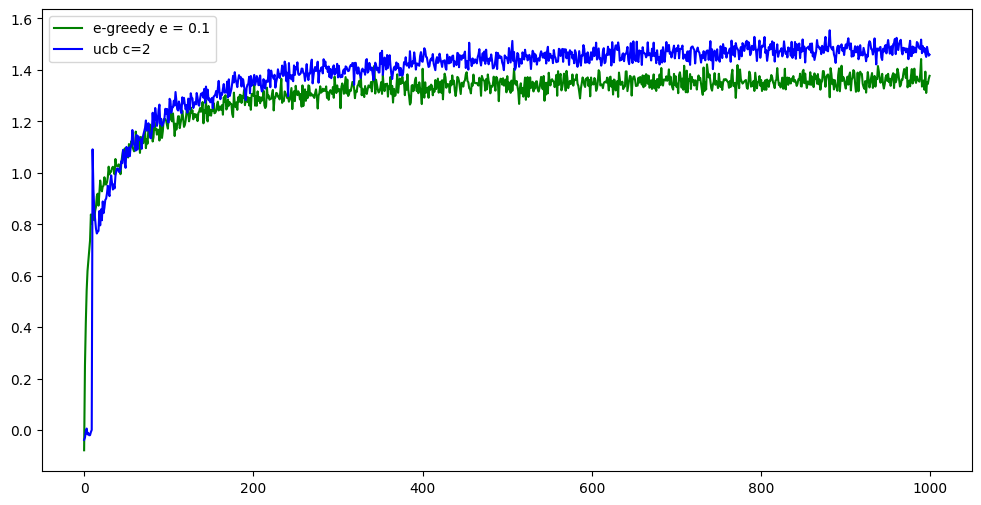

In [19]:
plt.figure(figsize=(12,6))
plt.plot(ep_1, 'g', label='e-greedy e = 0.1')
plt.plot(ucb_2, 'b', label='ucb c=2')
plt.legend()
plt.show()

Gradient Bandit Algorithms - this funtion implements the softmax action selection strtegy, which is commondly used in reinforcement learning and multi-armed bandits to make probabilistic action choices.

In [20]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    M = e_x / e_x.sum()
    return np.argmax(M), M

In [29]:
def gradient_bandit(k, steps,alpha, initial_Q, is_baseline=True):
    rewards = np.zeros(steps)
    actions = np.zeros(steps)

    for i in tqdm(range(num_problems)):
        Q = np.ones(k) * initial_Q #initial Q estimates action values (not used for seleciton bur for learning).
        N = np.zeros(k) # initialize number of rewards given
        R = np.zeros(k) # Rewards
        H = np.zeros(k) # initialize preferences keeps track of action preferecnes (higher means more likely to be chosen).
        pi = np.zeros(k) #stores the softmax probability distribution.
        best_action = np.argmax(q_star[i]) # best action of i'th problem

        for t in range(steps):
            a, pi = softmax(H)

            reward = bandit(a, i)
            N[a] += 1
            Q[a]= Q[a] + (reward - Q[a]) / N[a]

            for action_i in range(k):
                if action_i == a:
                    H[a] = H[a] + alpha * (reward - R[a]) * (1 - pi[a])
                else:
                    H[action_i] = H[action_i] - alpha* (reward-R[action_i]) * pi[action_i]

            if is_baseline == True:
                R[a] = Q[a]
            rewards[t] += reward
            if a == best_action:
                actions[t] +=1 

In [30]:
sft_1,ac_sft_1=gradient_bandit(k=10,steps=1000,alpha=0.4,initial_Q=0,is_baseline=False)
sft_1_baseline,ac_sft_1_baseline=gradient_bandit(k=10,steps=1000,alpha=0.4,initial_Q=0,is_baseline=True)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:38<00:00, 20.29it/s]


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
sft_1,ac_sft_1=gradient_bandit(k=10,steps=1000,alpha=0.1,initial_Q=0,is_baseline=False)
sft_1_baseline,ac_sft_1_baseline=gradient_bandit(k=10,steps=1000,alpha=0.1,initial_Q=0,is_baseline=True)